In [3]:
import pickle
import math
import random
import numpy as np
import matplotlib.pyplot as plt

# Fig 1

In [4]:
N = 3                             # No. of agents
T = 10
alpha = 0.5                       # Exponent
ENS_step = 1000                    # Ensemble
MC_step = 100                     # (Macro) Step

spin_config = ['NP', 'NH', 'AR', 'SH', 'SP']

Text(0.5, 0.03, 'time (t)')

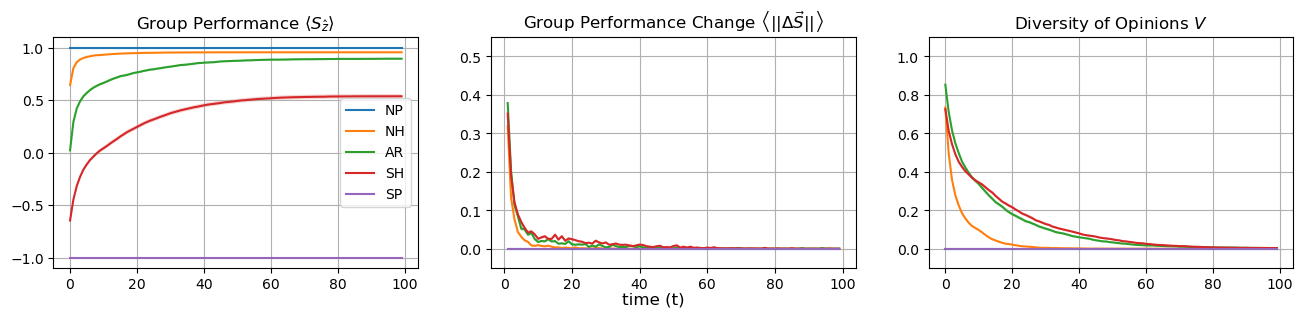

In [11]:
fig,axs = plt.subplots(1,3,figsize=(16,3))

t = np.arange(0, MC_step)

axs[0].set_ylim([-1.1,1.1])
axs[1].set_ylim([-0.05,0.55])
axs[2].set_ylim([-0.1,1.1])

# N=3
N = 3
S_array = []
V_array = []
del_S_array = []
for idx, config in enumerate(spin_config):
  with open(f"Sarray_N{N}_T{T}_alpha{alpha}_{config}.pkl","rb") as f:
    S_array.append(pickle.load(f))
  with open(f"Varray_N{N}_T{T}_alpha{alpha}_{config}.pkl","rb") as f:
    V_array.append(pickle.load(f))
  with open(f"DelS_array_N{N}_T{T}_alpha{alpha}_{config}.pkl","rb") as f:
    del_S_array.append(pickle.load(f))

axs[0].set_title(r'Group Performance $\left\langle S_\hat{z} \right\rangle$')
for i, config in enumerate(spin_config):
  Savg = np.array([S_array[i][mc, :, :,2].mean(1).mean() for mc in range(MC_step)])
  Sstd = np.array([np.std(S_array[i][mc, :, :,2].mean(1))/(ENS_step**0.5) for mc in range(MC_step)])
  axs[0].plot(t, Savg, '-', label = config)
  axs[0].fill_between(t, Savg - Sstd, Savg + Sstd, alpha = 0.2)
axs[0].legend()
axs[0].grid()

axs[1].set_title(r"Group Performance Change $\left\langle || \Delta \vec{S} || \right\rangle$")
for i, config in enumerate(spin_config):
  delSavg = np.array([del_S_array[i][mc,:,0].mean() for mc in range(1,MC_step)])
  delSstd = np.array([np.std(del_S_array[i][mc,:,0])/(ENS_step**0.5) for mc in range(1,MC_step)])
  axs[1].plot(t[1:], delSavg, '-')
  axs[1].fill_between(t[1:], delSavg - delSstd, delSavg + delSstd, alpha = 0.2)
axs[1].grid()

axs[2].set_title(r'Diversity of Opinions $V$')
for i, config in enumerate(spin_config):
  Vavg = np.array([V_array[i][mc,:].mean() for mc in range(MC_step)])
  Vstd = np.array([np.std(V_array[i][mc,:])/(ENS_step**0.5) for mc in range(MC_step)])
  axs[2].plot(t, Vavg, '-')
  axs[2].fill_between(t, Vavg - Vstd, Vavg + Vstd, alpha = 0.2)
axs[2].grid()

fig.suptitle("time (t)", y = 0.03)

# Fig 2

In [15]:
N = 3                             # No. of agents
alpha = 0.5                       # Exponent
ENS_step = 1000                    # Ensemble
MC_step = 100                     # (Macro) Step

spin_config = ['NH', 'AR', 'SH']

Text(0.5, 0.03, 'time (t)')

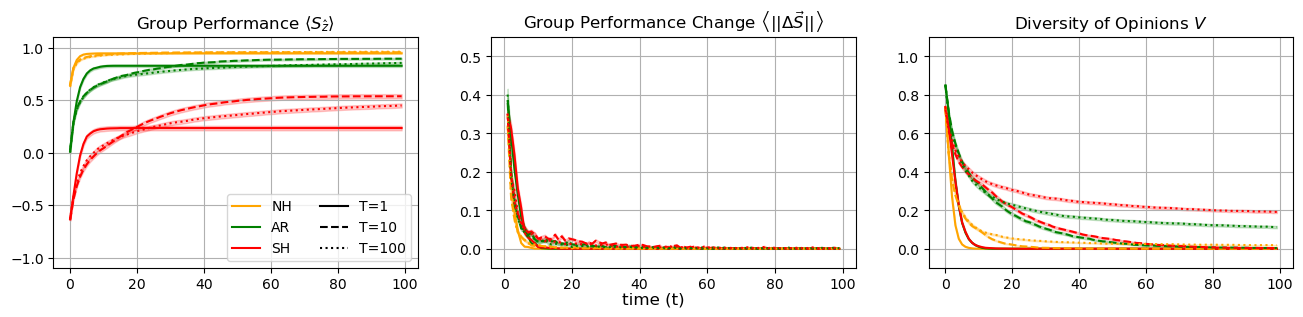

In [55]:
fig,axs = plt.subplots(1,3,figsize=(16,3))

t = np.arange(0, MC_step)

axs[0].set_ylim([-1.1,1.1])
axs[1].set_ylim([-0.05,0.55])
axs[2].set_ylim([-0.1,1.1])

# N=3
line = ['-', '--', ':']
col = ['orange', 'green', 'red']

for idx, T in enumerate([1,10,100]):
    S_array = []
    V_array = []
    del_S_array = []

    for config in spin_config:
      with open(f"Sarray_N{N}_T{T}_alpha{alpha}_{config}.pkl","rb") as f:
        S_array.append(pickle.load(f))
      with open(f"Varray_N{N}_T{T}_alpha{alpha}_{config}.pkl","rb") as f:
        V_array.append(pickle.load(f))
      with open(f"DelS_array_N{N}_T{T}_alpha{alpha}_{config}.pkl","rb") as f:
        del_S_array.append(pickle.load(f))

    axs[0].set_title(r'Group Performance $\left\langle S_\hat{z} \right\rangle$')
    for i, config in enumerate(spin_config):
      Savg = np.array([S_array[i][mc, :, :,2].mean(1).mean() for mc in range(MC_step)])
      Sstd = np.array([np.std(S_array[i][mc, :, :,2].mean(1))/(ENS_step**0.5) for mc in range(MC_step)])
      axs[0].plot(t, Savg, color=col[i], linestyle=line[idx])
      axs[0].fill_between(t, Savg - Sstd, Savg + Sstd, color=col[i], alpha = 0.2)
    axs[0].grid()

    axs[1].set_title(r"Group Performance Change $\left\langle || \Delta \vec{S} || \right\rangle$")
    for i, config in enumerate(spin_config):
      delSavg = np.array([del_S_array[i][mc,:,0].mean() for mc in range(1,MC_step)])
      delSstd = np.array([np.std(del_S_array[i][mc,:,0])/(ENS_step**0.5) for mc in range(1,MC_step)])
      axs[1].plot(t[1:], delSavg, color=col[i], linestyle=line[idx])
      axs[1].fill_between(t[1:], delSavg - delSstd, delSavg + delSstd, color=col[i], alpha = 0.2)
    axs[1].grid()

    axs[2].set_title(r'Diversity of Opinions $V$')
    for i, config in enumerate(spin_config):
      Vavg = np.array([V_array[i][mc,:].mean() for mc in range(MC_step)])
      Vstd = np.array([np.std(V_array[i][mc,:])/(ENS_step**0.5) for mc in range(MC_step)])
      axs[2].plot(t, Vavg, color=col[i], linestyle=line[idx])
      axs[2].fill_between(t, Vavg - Vstd, Vavg + Vstd, color=col[i], alpha = 0.2)
    axs[2].grid()

axs[0].plot(1,1,color='orange', label='NH')
axs[0].plot(1,1,color='green', label='AR')
axs[0].plot(1,1,color='red', label='SH')
axs[0].plot(1,1,color='k', linestyle='-', label='T=1')
axs[0].plot(1,1,color='k', linestyle='--', label='T=10')
axs[0].plot(1,1,color='k', linestyle=':', label='T=100')
axs[0].legend(ncol=2)
    
    
fig.suptitle("time (t)", y = 0.03)

# Fig 3

In [56]:
N = 3                             # No. of agents
T = 10
ENS_step = 1000                    # Ensemble
MC_step = 100                     # (Macro) Step

spin_config = ['NH', 'AR', 'SH']

Text(0.5, 0.03, 'time (t)')

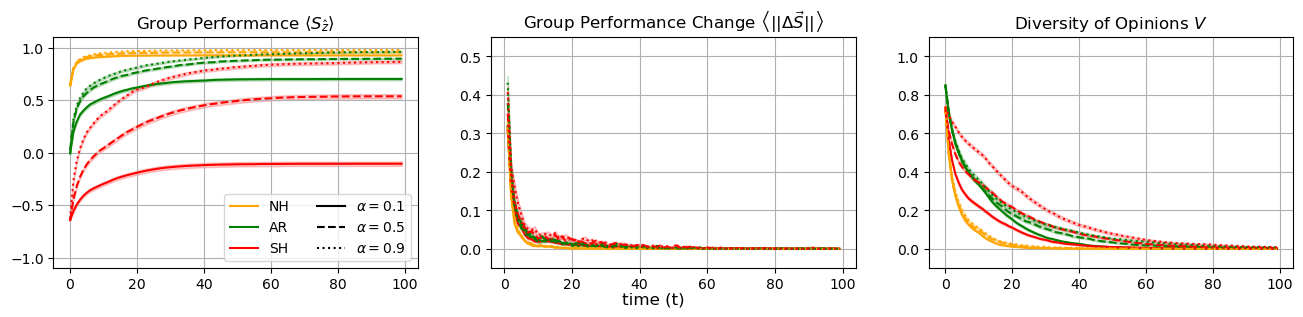

In [61]:
fig,axs = plt.subplots(1,3,figsize=(16,3))

t = np.arange(0, MC_step)

axs[0].set_ylim([-1.1,1.1])
axs[1].set_ylim([-0.05,0.55])
axs[2].set_ylim([-0.1,1.1])

# N=3
line = ['-', '--', ':']
col = ['orange', 'green', 'red']

for idx, alpha in enumerate([0.1,0.5,0.9]):
    S_array = []
    V_array = []
    del_S_array = []

    for config in spin_config:
      with open(f"Sarray_N{N}_T{T}_alpha{alpha}_{config}.pkl","rb") as f:
        S_array.append(pickle.load(f))
      with open(f"Varray_N{N}_T{T}_alpha{alpha}_{config}.pkl","rb") as f:
        V_array.append(pickle.load(f))
      with open(f"DelS_array_N{N}_T{T}_alpha{alpha}_{config}.pkl","rb") as f:
        del_S_array.append(pickle.load(f))

    axs[0].set_title(r'Group Performance $\left\langle S_\hat{z} \right\rangle$')
    for i, config in enumerate(spin_config):
      Savg = np.array([S_array[i][mc, :, :,2].mean(1).mean() for mc in range(MC_step)])
      Sstd = np.array([np.std(S_array[i][mc, :, :,2].mean(1))/(ENS_step**0.5) for mc in range(MC_step)])
      axs[0].plot(t, Savg, color=col[i], linestyle=line[idx])
      axs[0].fill_between(t, Savg - Sstd, Savg + Sstd, color=col[i], alpha = 0.2)
    axs[0].grid()

    axs[1].set_title(r"Group Performance Change $\left\langle || \Delta \vec{S} || \right\rangle$")
    for i, config in enumerate(spin_config):
      delSavg = np.array([del_S_array[i][mc,:,0].mean() for mc in range(1,MC_step)])
      delSstd = np.array([np.std(del_S_array[i][mc,:,0])/(ENS_step**0.5) for mc in range(1,MC_step)])
      axs[1].plot(t[1:], delSavg, color=col[i], linestyle=line[idx])
      axs[1].fill_between(t[1:], delSavg - delSstd, delSavg + delSstd, color=col[i], alpha = 0.2)
    axs[1].grid()

    axs[2].set_title(r'Diversity of Opinions $V$')
    for i, config in enumerate(spin_config):
      Vavg = np.array([V_array[i][mc,:].mean() for mc in range(MC_step)])
      Vstd = np.array([np.std(V_array[i][mc,:])/(ENS_step**0.5) for mc in range(MC_step)])
      axs[2].plot(t, Vavg, color=col[i], linestyle=line[idx])
      axs[2].fill_between(t, Vavg - Vstd, Vavg + Vstd, color=col[i], alpha = 0.2)
    axs[2].grid()

axs[0].plot(1,1,color='orange', label='NH')
axs[0].plot(1,1,color='green', label='AR')
axs[0].plot(1,1,color='red', label='SH')
axs[0].plot(1,1,color='k', linestyle='-', label=r'$\alpha=0.1$')
axs[0].plot(1,1,color='k', linestyle='--', label=r'$\alpha=0.5$')
axs[0].plot(1,1,color='k', linestyle=':', label=r'$\alpha=0.9$')
axs[0].legend(ncol=2)
    
    
fig.suptitle("time (t)", y = 0.03)